Final centroids:
 [[20.5        79.        ]
 [19.33333333 28.33333333]]
Final cluster assignment: [1 0 1 0 1]


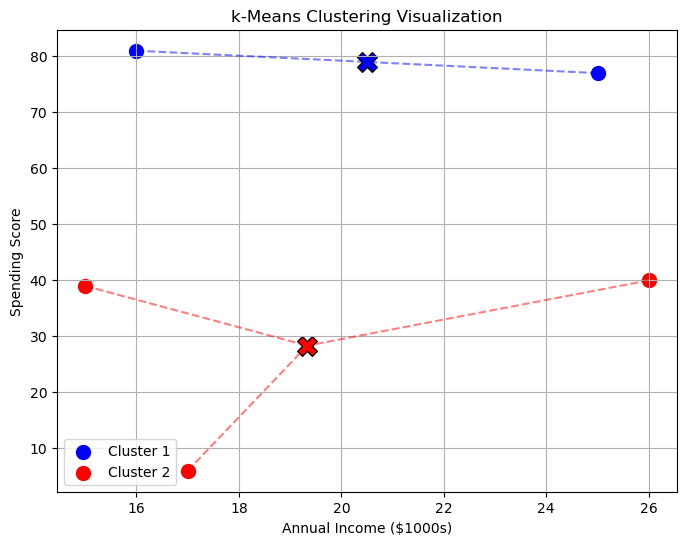

In [1]:
# K means Clustering

import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng()

dataset = np.array([[15,39],[16,81], [17, 6], [25,77],[26, 40]])
K = 2 # num of clusters
max_iter = 100 
centroids = rng.choice(dataset, size=K, axis=0, replace=False) # generate a random number of centroids 

for i in range(max_iter):
    distance = np.sum((dataset[:, np.newaxis, :] - centroids) ** 2, axis=2) # using euclidean distance to get the distance between each point
    min_items_pos = np.argmin(distance, axis=1) # get the index of the centroids

    new_centroids = np.array([
        dataset[min_items_pos == x].mean(axis=0)
        if len(dataset[min_items_pos == x]) > 0
        else centroids[x]
        for x in range(K)
    ]) # Re-caculate the centroids by getting the mean of the 

    if np.allclose(centroids,new_centroids):
        break
    centroids = new_centroids

print("Final centroids:\n", centroids)
print("Final cluster assignment:", min_items_pos)

colors = ["blue", "red"]

plt.figure(figsize=(8, 6))

# Plot each cluster
for k in range(K):
    points = dataset[min_items_pos == k]
    plt.scatter(
        points[:, 0], points[:, 1], color=colors[k], label=f"Cluster {k + 1}", s=100
    )
    plt.scatter(
        centroids[k, 0],
        centroids[k, 1],
        color=colors[k],
        marker="X",
        s=200,
        edgecolor="black",
    )

    # Draw lines from points to centroid
    for point in points:
        plt.plot(
            [point[0], centroids[k, 0]],
            [point[1], centroids[k, 1]],
            color=colors[k],
            linestyle="--",
            alpha=0.5,
        )

plt.xlabel("Annual Income ($1000s)")
plt.ylabel("Spending Score")
plt.title("k-Means Clustering Visualization")
plt.legend()
plt.grid(True)
plt.show()


